In [1]:
import os
import fnmatch
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#plt.rcParams["font.family"] = 'arial'
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib
matplotlib.style.use('classic')

matplotlib.rcParams['mathtext.fontset'] = 'custom'
# set the font
plt.rcParams["font.family"] = 'arial' #'Bitstream Vera Sans'# 'arial' #
matplotlib.rcParams['mathtext.rm'] = 'arial' #'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'arial:italic' #'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'arial:bold' #'Bitstream Vera Sans:bold'

%matplotlib notebook

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
#     x_labelsize = subax.get_xticklabels()[0].get_size()
#     y_labelsize = subax.get_yticklabels()[0].get_size()
#     x_labelsize *= rect[2]**0.5
#     y_labelsize *= rect[3]**0.5
#     subax.xaxis.set_tick_params(labelsize=x_labelsize)
#     subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

<IPython.core.display.Javascript object>


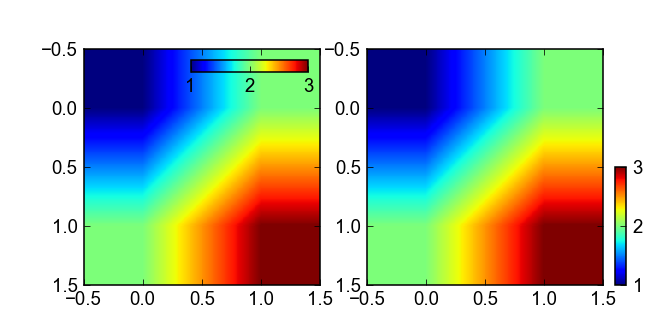

In [2]:
# Ａｎ　ｅｘａｍｐｌｅ　ｆｏｒ　ａｄｄｉｎｇ　ｉｎｓｅｔ
%matplotlib qt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

axins1 = inset_axes(ax1,
                    width="50%",  # width = 10% of parent_bbox width
                    height="5%",  # height : 50%
                    loc=1)

im1 = ax1.imshow([[1, 2], [2, 3]])
plt.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
axins1.xaxis.set_ticks_position("bottom")

axins = inset_axes(ax2,
                   width="5%",  # width = 10% of parent_bbox width
                   height="50%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

# Controlling the placement of the inset axes is basically same as that
# of the legend.  you may want to play with the borderpad value and
# the bbox_to_anchor coordinate.

im = ax2.imshow([[1, 2], [2, 3]])
plt.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.draw()
plt.show()

## Isotope sample: plot, fit the T_f, mydosh fit

(50L, 33L)


<IPython.core.display.Javascript object>


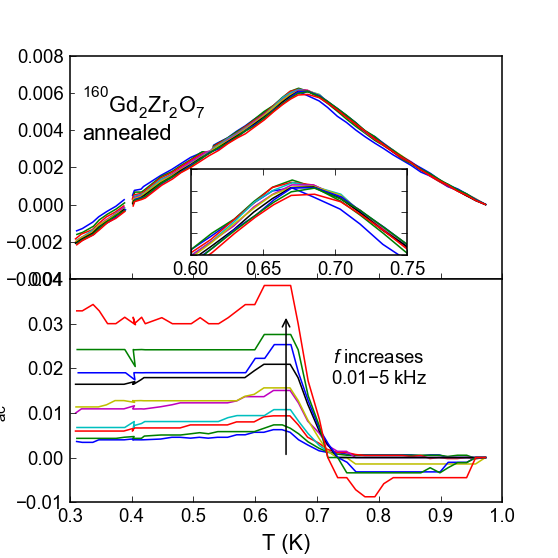

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
# find the files: 590 - 5000 Hz (the 100 Hz data is skipped)
fpath=r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope/'
fname = r'isotope_gdzro_xac_lowTann.txt' # the redueced data

dat = np.genfromtxt(os.path.join(fpath,fname))
print dat.shape

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(5,5))
nb_of_files = 11

for i in np.arange(3,nb_of_files*3,3): # skip the noisy 100Hz data   
    #print i
    x, y, z = dat[:-2,i],dat[:-2,i+1],dat[:-2,i+2]
    y, z = y-y[-1],z-z[-1] # real and imaginary part
    
    ax1.plot(x, z, label=str(i))
    ax2.plot(x, y)
    
    rect = [0.28,0.02,0.5,0.42]
    ins_ax = add_subplot_axes(ax1,rect)
    ins_ax.plot(x, z, label=str(i))
    

ins_ax.set_xlim(0.6,0.75)
ins_ax.set_ylim(0.0045,0.0065)  
plt.setp(ins_ax.get_xticklabels(), visible=True)
plt.setp(ins_ax.get_yticklabels(), visible=False)
plt.locator_params(axis='x',nbins=8)

ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14)#,labelpad=0)  
ax2.set_xlabel(r'T (K)',size=14)#,labelpad=0)
ax2.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",size=14)#,labelpad=0)

ax1.tick_params(axis='both',which='both',labelsize=12)
ax2.tick_params(axis='both',which='both',labelsize=12) # width=1,length=4,

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)

ax2.annotate('', xy=(0.65,0.032),fontsize=12, xytext=(0.65,0.0),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='bottom')
bbox_props = dict(fc="white", ec="white", lw=0.5)#,boxstyle="rarrow,pad=0.")
t = ax2.text(0.8, 0.02, "$f$ increases\n0.01$-$5 kHz", ha="center", va="center", rotation=0,size=12,zorder=0, bbox=bbox_props)

ax1.text(0.32, 0.005,r'$^{160}$Gd$_2$Zr$_2$O$_7$'+ '\n'+'annealed',size=14, ha='left', va='center',
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#fig.savefig(os.path.join(fpath, r'isogd_xac_ann.pdf'), bbox_inches="tight",verbose=True) 

plt.show()


<IPython.core.display.Javascript object>


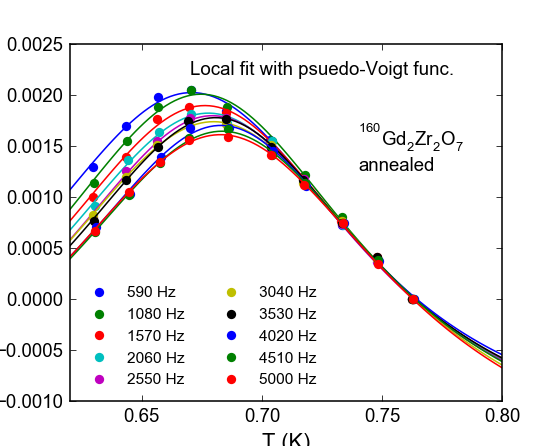

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:50: RuntimeWarning: invalid value encountered in sqrt
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [4]:
# Ｆｉｔ　ｔｈｅ　ｐｅａｋ　ｐｏｓｉｔｉｏｎｓ：　ｆ，Ｔｆ，　ｅｒｒ
def lor_func(x,*args):
    if len(args)==1:
        a,b,c = args[0]
        return a/((x-c)**2+b**2)
    else:
        return args[0]/((x-args[2])**2+args[1]**2)

def gau_func(x,*args):
    if len(args)==1:
        a,b,c = args[0]
        return a*np.exp(-(x-c)**2/(2*b**2))
    else:
        return args[0]*np.exp(-(x-args[2])**2/(2*args[1]**2))

def pv_func(x,*args):# pv function with constant background
    if len(args)==1:
        a1,b1,c,a2,b2, bkg = args[0]
        return gau_func(x,[a1,b1,c])+lor_func(x,[a2,b2,c])+bkg
    else:
        return gau_func(x,[args[0],args[1],args[2]])+lor_func(x,[args[3],args[4],args[2]])+args[5]

def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(5,4))

nb_of_files = 11
x1, x2 = 0.62, 0.8 # Fit region
p0 = [0.00005,0.005, 0.68, 0.00005,0.005, 0.005] #starting parameters: area1, width1, centre, a2, w2, backg

fitx = np.linspace(0.62,0.8,100) # for plot fit
result = np.empty([10,3]) # store fitted pars: frequency, position
result[:,0] = np.linspace(590,5000,10,endpoint=True) # the 11 frequencies

for idx, i in enumerate(np.arange(3,nb_of_files*3,3)):
    data = fitReg(dat,x1,x2)
    x, y, z = data[:-2,i],data[:-2,i+1],data[:-2,i+2]
    
    y, z = y-y[-1],z-z[-1]
    
    freqlab = result[idx,0]
    plot0 = ax.plot(x, z,  'o', mec='none', label='%d Hz'%(freqlab))
    
    popt, pcov = curve_fit(pv_func, x, z, p0=p0)
    perr = np.sqrt(np.diag(pcov))
    result[idx,1:] = [popt[2],perr[2]]
    #print i, popt, perr
    
    ax.plot(fitx, pv_func(fitx,popt), c=plot0[0].get_color())

ax.text(0.67, 0.00225,'Local fit with psuedo-Voigt func.', size=12, ha='left', va='center',
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))
ax.text(0.74, 0.0015,r'$^{160}$Gd$_2$Zr$_2$O$_7$'+ '\n'+'annealed',size=12, ha='left', va='center',
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))
ax.set_xlim([0.62,0.8])
ax.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14)#,labelpad=0)  
ax.set_xlabel(r'T (K)',size=14)#,labelpad=0)
ax.tick_params(axis='both',which='both',labelsize=12)
plt.legend(numpoints=1,loc='best',frameon=False,fontsize=10,ncol=2).draggable()
fig.savefig(os.path.join(fpath, r'isogd_xac_ann_local_fit.pdf'), bbox_inches="tight",verbose=True) 
plt.show() 

In [5]:
# Ｃｒｉｔｉｃａｌ　ｓｌｏｗｉｎｇ　ｄｏｗｎ　ｄｙｎａｍｉｃｓ　(see book by Mydosh: Spin Glass, Eq.3.33)
# Fit with \tau = \tau0 (Tf/Tg - 1)^-zv ( inverted)　
from scipy import odr

def func(beta, xy):
    """ implicit definition of critical slowing down dynamics """
    f0, Tg, zv = beta # relaxation rate, frozen T, exponent
    f, Tf = xy[0],xy[1]
    return f0 * (Tf/Tg - 1)**zv - f

def func0(beta, xy): # not used
    """ implicit definition of critical slowing down dynamics """
    return beta[0] * (xy[1]/beta[1] - 1)**beta[2] - xy[0]

def cal_f(beta, x):
    f0, Tg, zv = beta
    Tf = x
    return f0 * (Tf/Tg - 1)**zv
     
x, y, e = result[:-1,0], result[:-1,1], result[:-1,2] 
e[-1]=e[-2]# replace inf

# odr fit implicit func, with error is better; if error contain inf, it not work; 
# y = scalar for implicit fit, is the dimensionality of the response
lsc_data = odr.RealData(x=np.row_stack([x, y]), y=1, sx=np.row_stack([0.1*x, e])) 

lsc_model = odr.Model(func, implicit=True)

lsc_odr = odr.ODR(lsc_data, lsc_model, [3e10, 0.66, 4.75],maxit=10000)
lsc_odr.set_job(fit_type=1) #fit_type : {0, 1, 2} for  explicit, implicit, ordinary least-squares

lsc_out = lsc_odr.run()

print lsc_out.beta,'\n', lsc_out.pprint()
print 'Absolute sigma', np.sqrt(np.diag(lsc_out.cov_beta)), 'Same with polyfit with absolute_sigma=True'
print 'Relate sigma',lsc_out.sd_beta, 'Same with polyfit with absolute_sigma=False'
#'''https://stackoverflow.com/questions/23951876/linear-fit-including-all-errors-with-numpy-scipy'''
# Bootstrap resmapling data, fit, further start with different parameters, mean the fitted par

[  7.18215428e+08   6.53487122e-01   3.87475131e+00] 
Beta: [  7.18215428e+08   6.53487122e-01   3.87475131e+00]
Beta Std Error: [  3.94138787e+09   1.46500755e-02   2.40786440e+00]
Beta Covariance: [[  6.22442641e+19  -2.29584491e+08   3.80004502e+10]
 [ -2.29584491e+08   8.59964870e-04  -1.40802236e-01]
 [  3.80004502e+10  -1.40802236e-01   2.32308465e+01]]
Residual Variance: 0.249573813443
Inverse Condition #: 0.000386989105159
Reason(s) for Halting:
  Parameter convergence
None
Absolute sigma [  7.88950341e+09   2.93251576e-02   4.81983885e+00] Same with polyfit with absolute_sigma=True
Relate sigma [  3.94138787e+09   1.46500755e-02   2.40786440e+00] Same with polyfit with absolute_sigma=False


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in power


<IPython.core.display.Javascript object>


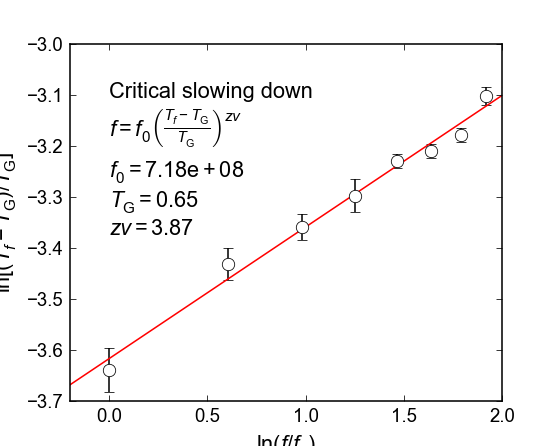

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in log


In [310]:
# Plot
Tfs = np.linspace(0.0001,0.7,100)
fs = cal_f(lsc_out.beta, Tfs)
#print fs
fig, ax0 = plt.subplots(nrows=1,ncols=1,figsize=(5,4))

ax0.errorbar(np.log(x/590.),np.log((y-lsc_out.beta[1])/lsc_out.beta[1]),e*lsc_out.beta[1]/(y-lsc_out.beta[1]), 
             label='Data', fmt='o', ms=8, ecolor='black', mec='black', mfc='white')
ax0.plot(np.log(fs/590.),np.log((Tfs-lsc_out.beta[1])/lsc_out.beta[1]),label='Critical dynamics',c='red')

ax0.text(0, -3.15,
         'Critical slowing down\n' r'$f=f_0\left(\frac{T_f-T_{\rm G}}{T_{\rm G}}\right)^{zv}$',
         size=14, ha='left', va='center',
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

ax0.text(0, -3.3,
         r'$f_0={{\rm {p[0]:2.2e} }}$' '\n' r'$T_{{\rm G}}={p[1]:1.2f}$' '\n' r'$zv={p[2]:1.2f}$'.format(p=lsc_out.beta),
         size=14, ha='left', va='center',
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

# format rules: Latex now uses double {{ }}; {variable1: format}

#ax1.errorbar(x, y-y[0], e)

#ax0.set_xscale("log", nonposx='clip')
#ax0.set_yscale("log", nonposy='clip')

ax0.set_xlim([-0.2,2])
ax0.set_ylim([-3.7,-3.0])

# ax1.set_xscale("log", nonposx='clip')
# ax1.set_yscale("log", nonposy='clip')
#plt.legend().draggable()

ax0.set_xlabel(r'$\ln(f/f_0)$',fontsize=14)
ax0.set_ylabel(r'$\ln[(T_f-T_{\rm G})/T_{\rm G}]$',fontsize=14)
#fig.savefig(os.path.join(fpath, r'isogd_xac_ann_local_fit_critical_dyn.pdf'), bbox_inches="tight",verbose=True) 
plt.show()  

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in power


<IPython.core.display.Javascript object>


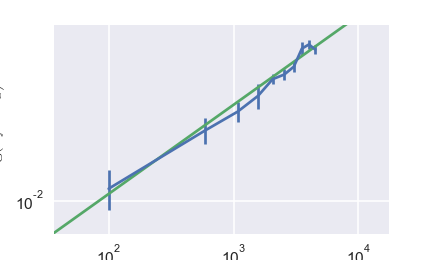

In [70]:
# Ajust by hand
from ipywidgets import interact, interactive, fixed # in the 'notebook' mode, '@interact' gives only one fig
import ipywidgets as widgets

def cal_f(beta, x):
    f0, Tg, zv = beta
    Tf = x
    return f0 * (Tf/Tg - 1)**zv

def fit_plot(f0=3*10**10, Tg=0.63, zv=6.5):
    global fig, ax, x, y, e, Tfs
    ax.cla()  # clear axis
    
    fs = cal_f([f0, Tg, zv], Tfs)

    ax.errorbar(x,y-Tg,e)
    ax.plot(fs,Tfs-Tg)

    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim([50,8000])
#     ax.set_ylim([0.03,0.1])

    ax.set_xlabel(r'$\log(f)$')
    ax.set_ylabel(r'$\log(T_f-T_{\rm G})$')
    #ax.text(0.5, 0.9, '20K, fitted with PV_func+cons.',transform=ax.transAxes,fontsize=10)
    #plt.title(fname[:-4])
    
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
Tfs = np.linspace(0.6,0.7,50)

interact(fit_plot, 
         f0=widgets.FloatSlider(min=2e9,max=5e10,step=0.5e10,value=3.7e10),
         Tg=widgets.FloatSlider(min=0.55,max=0.7,step=0.01,value=0.66),
         zv=widgets.FloatSlider(min=2,max=10,step=0.05,value=4.75)
        ) 

#plt.legend().draggable()
#plt.show()  

In [215]:
print result

[[  5.90000000e+02   6.70667038e-01   1.15767003e-03]
 [  1.08000000e+03   6.74632661e-01   1.02035617e-03]
 [  1.57000000e+03   6.76224146e-01   8.57614235e-04]
 [  2.06000000e+03   6.77668028e-01   1.22020666e-03]
 [  2.55000000e+03   6.79361130e-01   5.29281128e-04]
 [  3.04000000e+03   6.79853409e-01   5.52342502e-04]
 [  3.53000000e+03   6.80715284e-01   6.00451303e-04]
 [  4.02000000e+03   6.82860910e-01   7.85758618e-04]
 [  4.51000000e+03   6.83382168e-01   7.85758618e-04]
 [  5.00000000e+03   6.82741884e-01              inf]]


<IPython.core.display.Javascript object>


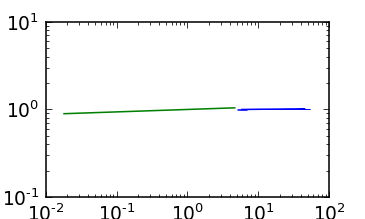

In [221]:
# Wrong mydosh parameter: f/f_0 = (T_f/T_0)^\phi -> log(f/f_0) = \phi log(T_f/T_0)
def cal_f0(beta, x):
    f0, Tg, zv = beta
    Tf = x
    return f0 * (Tf/Tg)**zv

def fit_plot(f0=590., Tg=0.6707, zv=0.2):
    global fig, ax, x, y, e, Tfs
    ax.cla()  # clear axis
    
    fs = cal_f0([f0, Tg, zv], Tfs)

    ax.errorbar(x/f0, y/Tg, e/Tg)
    ax.plot(fs/f0, Tfs/Tg)

    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim([50,8000])
#     ax.set_ylim([0.03,0.1])

    ax.set_xlabel(r'$\log(f)$')
    ax.set_ylabel(r'$\log(T_f-T_{\rm G})$')
    #ax.text(0.5, 0.9, '20K, fitted with PV_func+cons.',transform=ax.transAxes,fontsize=10)
    #plt.title(fname[:-4])    
    
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
Tfs = np.linspace(0.6,0.7,50)
x, y, e = result[:-1,0], result[:-1,1], result[:-1,2] 
e[-1]=e[-2]# replace inf

interact(fit_plot, 
         f0=widgets.FloatSlider(min=50,max=150,step=10,value=100),
         Tg=widgets.FloatSlider(min=0.55,max=0.7,step=0.01,value=0.6707),
         zv=widgets.FloatSlider(min=10,max=55,step=0.5,value=0.10)
        ) 


<IPython.core.display.Javascript object>


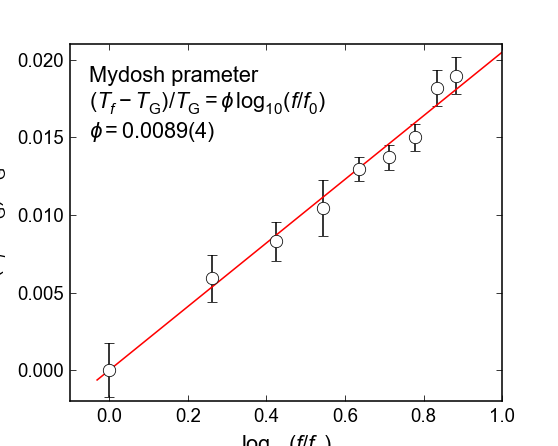

<function __main__.fit_plot>

In [307]:
# Correct mydosh parameter: \phi log(f/f_0) = (T_f-T_0)/T_0 -> \phi = \frac{(T_f-T_0)/T_0}{log(f/f_0)}
# see Haidong Zhou's paper on A2Sb2O7 (A=Mn,Co,Ni)
def cal_tf(beta, x):
    f0, Tg, zv = beta
    f = x
    return zv*Tg*np.log(f/f0)+Tg

def fit_plot(f0=590., Tg=0.6707, zv=0.2):
    global fig, ax, x, y, e, fs
    ax.cla()  # clear axis
    
    Ts = cal_tf([f0, Tg, zv], fs)

    ax.errorbar(np.log10(x/f0), (y-Tg)/Tg, e/Tg, label='Data', fmt='o', ms=8, ecolor='black', mec='black', mfc='white')
    ax.plot(np.log10(fs/f0), (Ts-Tg)/Tg, label='Mydosh fit',c='red')

    ax.text(-0.05, 0.017,'Mydosh prameter\n' r'$(T_f-T_{{\rm G}})/T_{{\rm G}} = \phi\,\log_{{10}}(f/f_0)$' '\n' r'$\phi={0:0.4f}(4)$'.format(zv),
         size=14, ha='left', va='center',
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))
    
    ax.set_ylabel(r'$(T_f-T_{\rm G})/T_{\rm G}$',fontsize=14)
    ax.set_xlabel(r'$\log_{10}(f/f_0)$',fontsize=14)
    ax.set_xlim([-0.1,1.0])
    ax.set_ylim([-0.002,0.021])
    #fig.savefig(os.path.join(fpath, r'isogd_xac_ann_local_fit_mydosh.pdf'), bbox_inches="tight",verbose=True) 
   
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})
fs = np.linspace(550,6000,50)
x, y, e = result[:-1,0], result[:-1,1], result[:-1,2] 
e[-1]=e[-2]# replace inf

interact(fit_plot, 
         f0=widgets.FloatSlider(min=500,max=600,step=10,value=590), # shold be fixed to be experimental
         Tg=widgets.FloatSlider(min=0.66,max=0.68,step=0.0001,value=0.67066), # shold be fixed to be experimental
         zv=widgets.FloatSlider(min=0.005,max=0.01,step=0.0001,value=0.0089)
        ) 


<IPython.core.display.Javascript object>


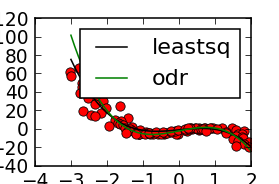

In [214]:
# Test scipy.odr
'''https://stackoverflow.com/questions/26058792/correct-fitting-with-scipy-curve-fit-including-errors-in-x
Fit with x error using scipy.odr
It can also fit implicity function
'''
from scipy.odr import ODR, Model, Data, RealData
import numpy as np

def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

# generate data
x = np.linspace(-3,2,100)
y = func([-2.3,7.0,-4.0], x)

# add some noise
x += np.random.normal(scale=0.3, size=100)
y += np.random.normal(scale=0.1, size=100)

data = RealData(x, y, 0.3, 0.1)
model = Model(func)

odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
output = odr.run()

xn = np.linspace(-3,2,50)
yn = func(output.beta, xn)
#hold(True)

fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(5,5))
plt.plot(x,y,'ro')
plt.plot(xn,yn,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
yn = func(output.beta, xn)
plt.plot(xn,yn,'g-',label='odr')
plt.legend(loc=0)
plt.show()

In [30]:
# find the files
fpath=r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\TempScan_FrequencyScan_annealed_autorange_all/'
fpath=r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\TempScan_FrequencyScan_annealed_autorange_all/'
fname = r'Freq*.txt' # the redueced data

ii=0 #index for different files
fnames = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames.append(os.path.join(fpath,file))
print fnames[0]

Freq1.txt
Freq10.txt
Freq11.txt
Freq2.txt
Freq3.txt
Freq4.txt
Freq5.txt
Freq6.txt
Freq7.txt
Freq8.txt
Freq9.txt
D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\TempScan_FrequencyScan_annealed_autorange_all/Freq1.txt


<IPython.core.display.Javascript object>


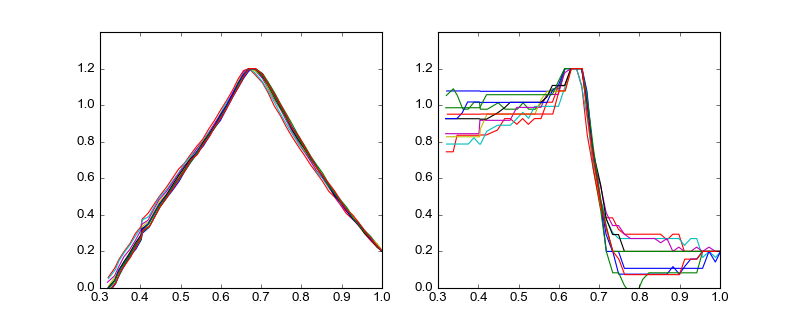

(0, 1.4)

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

nb_of_files = 11

for i in np.arange(1,nb_of_files,1):
    dat = np.genfromtxt(fnames[i])
    x, y, z = np.hstack((dat[-8:-1,0], dat[2:-8,0])),np.hstack((dat[-8:-1,1], dat[2:-8,1])),np.hstack((dat[-8:-1,2], dat[2:-8,2]))
    y, z = y-y[-1],z-z[-1]
    y, z = y/y.max()+0.2,z/z.max()+0.2
    ax1.plot(x, z, label=str(i))
    ax2.plot(x, y)
    
#ax1.legend()
plt.show()

ax1.set_xlim(0.3,1.0)
ax1.set_ylim(0,1.4)

ax2.set_xlim(0.3,1.0)
ax2.set_ylim(0,1.4)
# #ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

# ax1.minorticks_on()
# ax2.minorticks_on()

# # font0 = FontProperties()
# # font = font0.copy()
# # font.set_family('arial')
# # ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14, fontproperties=font)#,labelpad=0) 
 
# ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14, fontproperties=font)#,labelpad=0)  
# ax2.set_xlabel(r'T (K)',size=14)#,labelpad=0)
# ax2.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",size=14)#,labelpad=0)

# ax1.tick_params(axis='both',which='both',labelsize=12)
# ax2.tick_params(axis='both',which='both',labelsize=12) # width=1,length=4,

# ax1.xaxis.set_ticks_position('bottom')
# ax1.yaxis.set_ticks_position('left')
# ax2.xaxis.set_ticks_position('bottom')
# ax2.yaxis.set_ticks_position('left')

# # Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
# fig.subplots_adjust(hspace=0)
# #plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# #ax1.annotate('', xy=(0.73,0.87),fontsize=12, xytext=(0.63,0.7),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='bottom')
# #bbox_props = dict(fc="white", ec="white", lw=0.5)#,boxstyle="rarrow,pad=0.")
# #t = ax1.text(0.68, 0.68, r"$f$ increases", ha="center", va="center", rotation=20,size=12,zorder=0, bbox=bbox_props)

# ax1.text(0.68, 0.2,r'Gd$_2$Zr$_2$O$_7$'+ '\n'+'annealed crystal',size=14, ha='left', va='center',
#          backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

# #fig.savefig(os.path.join(fpath, r'gd_xac_crys_ann.pdf'), bbox_inches="tight",verbose=True) 
# plt.show()

# #print dat[:,0].real,'\n', dat[:,48].real

In [47]:
# find the files
fpath=r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\0_Data\TempScan_FrequencyScan_unannealed_autorange_real/'
fname = r'ACS_GdZrO_TempScan_real_*.dat' # the redueced data

ii=0 #index for different files
fnames0 = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames0.append(os.path.join(fpath,file))
print fnames0[0]

# find the files
fpath=r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\0_Data\TempScan_FrequencyScan_unannealed_autorange_img/'
fname = r'ACS_GdZrO_TempScan_img_*.dat' # the redueced data

ii=0 #index for different files
fnames1 = []
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):
        print(file)
        fnames1.append(os.path.join(fpath,file))
print fnames1[0]

ACS_GdZrO_TempScan_real_0.dat
ACS_GdZrO_TempScan_real_1.dat
ACS_GdZrO_TempScan_real_10.dat
ACS_GdZrO_TempScan_real_2.dat
ACS_GdZrO_TempScan_real_3.dat
ACS_GdZrO_TempScan_real_4.dat
ACS_GdZrO_TempScan_real_5.dat
ACS_GdZrO_TempScan_real_6.dat
ACS_GdZrO_TempScan_real_7.dat
ACS_GdZrO_TempScan_real_8.dat
ACS_GdZrO_TempScan_real_9.dat
D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\0_Data\TempScan_FrequencyScan_unannealed_autorange_real/ACS_GdZrO_TempScan_real_0.dat
ACS_GdZrO_TempScan_img_0.dat
ACS_GdZrO_TempScan_img_1.dat
ACS_GdZrO_TempScan_img_10.dat
ACS_GdZrO_TempScan_img_2.dat
ACS_GdZrO_TempScan_img_3.dat
ACS_GdZrO_TempScan_img_4.dat
ACS_GdZrO_TempScan_img_5.dat
ACS_GdZrO_TempScan_img_6.dat
ACS_GdZrO_TempScan_img_7.dat
ACS_GdZrO_TempScan_img_8.dat
ACS_GdZrO_TempScan_img_9.dat
D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\2_Isotope\0_Data\TempScan_FrequencyScan_unannealed_autorange_img/ACS_GdZrO_TempScan_img_0.dat


<IPython.core.display.Javascript object>


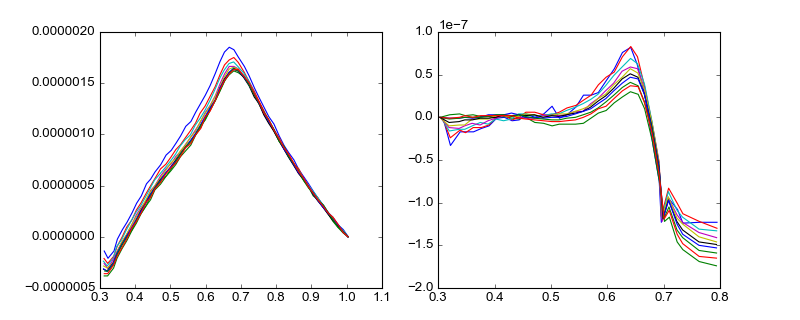

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

nb_of_files = 11
for i in np.arange(1,nb_of_files,1):
    dat = np.genfromtxt(fnames0[i])
    ax1.plot(dat[:,0], dat[:,1]-dat[len(dat)-1,1], label=str(i))
    dat = np.genfromtxt(fnames1[i])
    ax2.plot(dat[:,0], dat[:,1]-dat[0,1])
    
#ax1.legend()
plt.show()

# ax1.set_xlim(0.3,1.0)
# ax1.set_ylim(0,1.4)

# ax2.set_xlim(0.3,1.0)
# ax2.set_ylim(0,1.4)


# The annealed Gd/Zr ordered crystal

## Warming measurement

In [4]:
# Ｗａｒｍｉｎｇ　300mK-1.5K, freqency 100-5000Hz
# Ｌｏａｄ　ｄａｔａ　ｏｆ　　Ｇｄ２Ｚｒ２Ｏ７　ｃｒｙｓｔａｌ　ａｎｎｅａｌｅｄ　ａｔ　ｌｏｗ　Ｔ
# the file names were changed and different from above ones
fpath = r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\1_Single_crystal\lowT_ann'
fname = r'2016_08_24_ACS_CM8T_Heliox_LTS2_1mAAmpl_FreqScan_10Hz_5000Hz_up_TempScan_1K5_0K3_up.dat'
f = os.path.join(fpath, fname)

rawdat = np.genfromtxt(f, usecols=(2,5,6,7,8),skip_header=3) # temperature, frequency, current， Xreal, Ximagine
# This file constaind frequency scan (100-5000 Hz, 50pts) at every temperature in 300-1.5K (48 pts)
# one headline, two unuseful lines, the 5kHz is repeated for every Temperature but not the last temperture point
print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_fs = 50 # includ the repeated 5kHz
nb_Ts = 48
dat = np.zeros([48,49],dtype=complex) # 48 temps and 49 freqs (without one of the the repeated 5kHz)
print dat.shape

# Ｐｒｅｐａｒｅ　ｄａｔａ　ｆｏｒ　ｐｌｏｔ
temps = rawdat[0::50,0]
freqs = rawdat[0:49,1]

# for i in range(0,nb_fs-1): # only take the 48 freq except two 5kHz
#     dat[:,i].real = -rawdat[i::nb_fs,4]
#     dat[:,i].real = dat[:,i].real - dat[47,i].real # normalize it: subtraction the high T data piont (background)
#     dat[:,i].imag = -rawdat[i::nb_fs,3]    
#     dat[:,i].imag = dat[:,i].imag - dat[47,i].imag

# subtract the background
# for i in range(0,nb_fs-1): # take the 49 freq include one 5kHz
#     xr = -rawdat[i::nb_fs,4]
#     xi = -rawdat[i::nb_fs,3]
    
#     dat[:xr.shape[0],i].real = -rawdat[i::nb_fs,4]
#     dat[:,i].real = dat[:,i].real - dat[45,i].real # subtraction the high T data piont (background)
    
#     dat[:xr.shape[0],i].imag = -rawdat[i::nb_fs,3] 
#     dat[:,i].imag = dat[:,i].imag - dat[45,i].imag

# with normalization
for i in range(0,nb_fs-1): # take the 49 freq include one 5kHz
    xr = -rawdat[i::nb_fs,4]
    xi = -rawdat[i::nb_fs,3]
    
    dat[:xr.shape[0],i].real = -rawdat[i::nb_fs,4]
    dat[:,i].real = dat[:,i].real - dat[45,i].real # subtraction the high T data piont (background)
    dat[:,i].real = dat[:,i].real/dat[:,i].real.max() # normalize it
    
    dat[:xr.shape[0],i].imag = -rawdat[i::nb_fs,3]
    dat[:,i].imag = (dat[:,i].imag - dat[45,i].imag)*10**5
    #dat[:,i].imag = dat[:,i].imag/dat[:,i].imag.max()
    
dat[47,48]=np.nan # the 5kHz data has a bad point and replace it by nan

#np.savetxt(os.path.join(fpath, r'crys_ann_normed_real.dat'),np.hstack((temps.reshape((-1,1)), dat[:,:].real)), fmt='%1.4e')
#np.savetxt(os.path.join(fpath, r'crys_ann_normed_imag.dat'),np.hstack((temps.reshape((-1,1)), dat[:,:].imag)), fmt='%1.4e')

(2398L, 5L)
(48L, 49L)


<IPython.core.display.Javascript object>


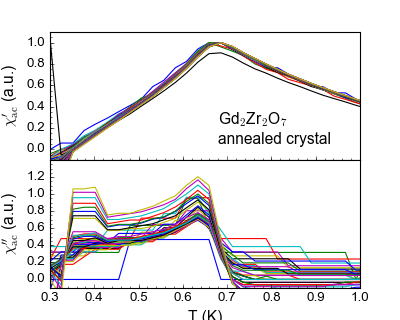

In [13]:
# Ｐｌｏｔ　ｔｈｅ　ｒｅａｌ　ａｎｄ　ｉｍａｇｉｎａｒｙ　ｐａｒｔ
% matplotlib notebook

#fig = plt.figure(figsize=(5,8))
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, figsize=(5,4))

#ax1 = fig.add_subplot(211, autoscale_on=True, xscale='linear')
#ax2 = fig.add_subplot(212, autoscale_on=True, sharex=ax1, sharey=ax1)   
#plt.suptitle(r"$\chi_{\rm ac}$ (ZFC) for annealed crystal ",fontsize=14, y=0.96)

for i in range(0,49):
    #print i, np.std(dat[temps<0.6,i].imag) 
    if np.std(dat[temps<0.6,i].imag)<0.4: # do not plot the data which is noisy for T<0.6~K
        ax1.plot(temps, dat[:,i].real)
        ax2.plot(temps, dat[:,i].imag)

#ax1.set_xlim(0.3,1.5)
ax1.set_ylim(-0.1,1.1)

ax2.set_xlim(0.3,1)
ax2.set_ylim(-0.1,1.4)
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

ax1.minorticks_on()
ax2.minorticks_on()

font0 = FontProperties()
font = font0.copy()
font.set_family('arial')
ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14, fontproperties=font)#,labelpad=0) 
 
ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14, fontproperties=font)#,labelpad=0)  
ax2.set_xlabel(r'T (K)',size=14)#,labelpad=0)
ax2.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",size=14)#,labelpad=0)

ax1.tick_params(axis='both',which='both',labelsize=12)
ax2.tick_params(axis='both',which='both',labelsize=12) # width=1,length=4,

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

#ax1.annotate('', xy=(0.73,0.87),fontsize=12, xytext=(0.63,0.7),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='bottom')
#bbox_props = dict(fc="white", ec="white", lw=0.5)#,boxstyle="rarrow,pad=0.")
#t = ax1.text(0.68, 0.68, r"$f$ increases", ha="center", va="center", rotation=20,size=12,zorder=0, bbox=bbox_props)

ax1.text(0.68, 0.2,r'Gd$_2$Zr$_2$O$_7$'+ '\n'+'annealed crystal',size=14, ha='left', va='center',
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

fig.savefig(os.path.join(fpath, r'gd_xac_crys_ann.pdf'), bbox_inches="tight",verbose=True) 
plt.show()

#print dat[:,0].real,'\n', dat[:,48].real

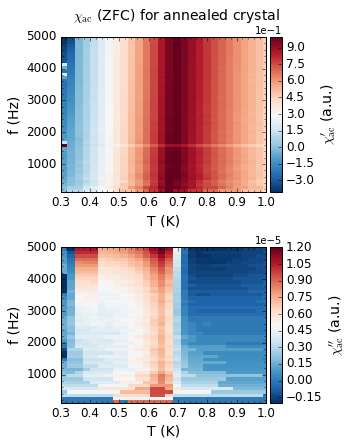

In [80]:
# Ｐｌｏｔ　ｃｏｌｏｒ　ｍａｐ　ｏｆ　ｔｈｅ　ｒｅａｌ　ｐａｒｔ
% matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig = plt.figure(figsize=(5,6))

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(5,6))# gridspec_kw = {'width_ratios':[5, 4]})
plt.suptitle(r"$\chi_{\rm ac}$ (ZFC) for annealed crystal ",fontsize=14, y=1.02)
#plt.contour(temps, freqs, dat.imag.T, 20, colors='k',linewidths=0.1)  # negative contours will be dashed by default

# pcolormesh actually draws individual rectangles which contains white lines
pcol = axs[0].pcolormesh(temps, freqs, dat.real.T, cmap='RdBu_r', vmax=1, linewidth=0, rasterized=True)# '_r' is reversed colormap
#pcol = axs[0].pcolormesh(temps, freqs, dat.real.T, cmap='RdBu_r', vmax=0.000145, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[0])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"$\chi_{\rm ac}'$ (a.u.)",fontsize=14)
cb.ax.tick_params(labelsize=12)


pcol = axs[1].pcolormesh(temps, freqs, dat.imag.T, cmap='RdBu_r', vmin=-0.000002, vmax=0.000012, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[1])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",fontsize=14)
cb.ax.tick_params(labelsize=12)
# set colorbar and its properties
#cb = plt.colorbar(format='%.1e') # it gives 0.3e-05 format for every tick lable

for ax in axs.reshape(-1):
    # set the limits of the plot to the limits of the data
    ax.axis([temps.min(), 1.0, freqs.min(), freqs.max()])
    #ax.axis([temps.min(), temps.max(), freqs.min(), freqs.max()])
    ax.set_xlabel('T (K)',size=14)
    ax.set_ylabel('f (Hz)',size=14)
    #ax.xaxis.labelpad = 1
    
    ax.minorticks_on()
    
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    
    [item.set_fontsize(12) for item in (ax.get_xticklabels()+ ax.get_yticklabels())]
    #ax.get_xticklabels().set_fontsize(14) # not working because  get_xticklabels() yeilds a list
    #ax.set_xticks( color='k', size=14) # not working

    

plt.tight_layout() # arange the subplots
plt.show()

# the transition at 0.695K

# the color map shows a bad line probally because in the maxmum for that frequency is a bad point

## Cooling measurement

In [81]:
# Ｃｏｏｌｉｎｇ 300mK-1.5K, freqency 100-5000Hz
# Ｌｏａｄ　ｄａｔａ　ｏｆ　　Ｇｄ２Ｚｒ２Ｏ７　ｃｒｙｓｔａｌ　ａｎｎｅａｌｅｄ　ａｔ　ｌｏｗ　Ｔ
# the file names were changed and different from above ones
fpath = r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\Single_crystal\lowT_ann'
fname = r'2016_08_25_ACS_CM8T_Heliox_LTS2_1mAAmpl_FreqScan_10Hz_5000Hz_up_TempScan_1K5_0K3_down_merge - mod.dat'
f = os.path.join(fpath, fname)

rawdat = np.genfromtxt(f, usecols=(2,5,6,7,8),skip_header=1) # temperature, frequency, current， Xreal, Ximagine
# This file constaind frequency scan (100-5000 Hz, 50pts) at every temperature in 300-1.5K (48 pts)
# one headline, two unuseful lines, the 5kHz is repeated for every Temperature but not the last temperture point
print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_fs = 50 # includ the repeated 5kHz
nb_Ts = 49
dat = np.zeros([49,49],dtype=complex) # 49 temps and 49 freqs (5kHz is repeated)
print dat.shape

# Ｐｒｅｐａｒｅ　ｄａｔａ　ｆｏｒ　ｐｌｏｔ
temps = rawdat[0::50,0]
freqs = rawdat[1:50,1]
#print temps, '\n', freqs

for i in range(0,nb_fs-1): # only take the 49 freq except two 5kHz
    dat[:,i].real = -rawdat[i+1::nb_fs,4]
    dat[:,i].real = dat[:,i].real - dat[1,i].real # normalize it: subtraction the high T data piont (background)
    dat[:,i].real = dat[:,i].real/dat[:,i].real.max() # normalize it
    dat[:,i].imag = -rawdat[i+1::nb_fs,3]    
    dat[:,i].imag = dat[:,i].imag - dat[1,i].imag

(2450L, 5L)
(49L, 49L)


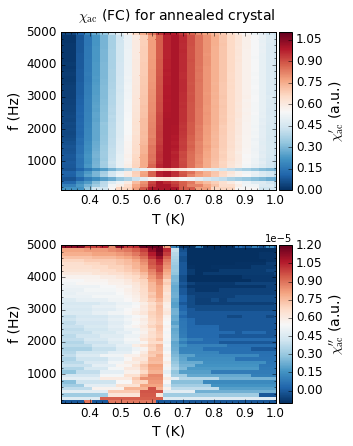

In [83]:
# Ｐｌｏｔ　ｃｏｌｏｒ　ｍａｐ　ｏｆ　ｔｈｅ　ｒｅａｌ　ｐａｒｔ
% matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig = plt.figure(figsize=(5,6))

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(5,6))#, gridspec_kw = {'width_ratios':[5, 4]})
plt.suptitle(r"$\chi_{\rm ac}$ (FC) for annealed crystal ",fontsize=14,y=1.02)

#plt.contour(temps, freqs, dat.imag.T, 20, colors='k',linewidths=0.1)  # negative contours will be dashed by default

# pcolormesh actually draws individual rectangles which contains white lines
#pcol = axs[0].pcolormesh(temps, freqs, dat.real.T, cmap='jet',vmin=-0.00, vmax=0.00012, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol = axs[0].pcolormesh(temps, freqs, dat.real.T, cmap='RdBu_r',vmin=-0.00, vmax=1.1, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[0])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"$\chi_{\rm ac}'$ (a.u.)",fontsize=14)
cb.ax.tick_params(labelsize=12)


pcol = axs[1].pcolormesh(temps, freqs, dat.imag.T, cmap='RdBu_r', vmin=-0.000001, vmax=0.000012, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[1])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",fontsize=14)
cb.ax.tick_params(labelsize=12)
# set colorbar and its properties
#cb = plt.colorbar(format='%.1e') # it gives 0.3e-05 format for every tick lable


for ax in axs.reshape(-1):
    # set the limits of the plot to the limits of the data
    ax.axis([temps.min(), 1.0, freqs.min(), freqs.max()])
    #ax.axis([temps.min(), temps.max(), freqs.min(), freqs.max()])
    ax.set_xlabel('T (K)',size=14)
    ax.set_ylabel('f (Hz)',size=14)
    #ax.xaxis.labelpad = 1
    
    ax.minorticks_on()
    
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    
    [item.set_fontsize(12) for item in (ax.get_xticklabels() + ax.get_yticklabels())]
    #ax.get_xticklabels().set_fontsize(14) # not working because  get_xticklabels() yeilds a list
    #ax.set_xticks( color='k', size=14) # not working

plt.tight_layout() # arange the subplots
plt.show()

# the transition at 0.655K

# Below is the unannealed Gd/Zr disordered sample

## T scan F  scan Cooling

In [22]:
# Ｃｏｏｌｉｎｇ 300mK-1.5K, freqency 100-5000Hz
# Ｌｏａｄ　ｄａｔａ　ｏｆ　　Ｇｄ２Ｚｒ２Ｏ７　ｃｒｙｓｔａｌ　ａｎｎｅａｌｅｄ　ａｔ　ｌｏｗ　Ｔ
# the file names were changed and different from above ones
fpath = r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\1_Single_crystal\unann_GdZr_disorder'
fname = r'2016_08_26_ACS_CM8T_Heliox_LTS2_1mAAmpl_FreqScan_10Hz_5000Hz_up_TempScan_1K5_0K3_down-mod.dat'
f = os.path.join(fpath, fname)

rawdat = np.genfromtxt(f, usecols=(2,5,6,7,8),skip_header=1) # temperature, frequency, current， Xreal, Ximagine
# This file constaind frequency scan (100-5000 Hz, 50pts) at every temperature in 300-1.5K (48 pts)
# one headline, two unuseful lines, the 5kHz is repeated for every Temperature but not the last temperture point
print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_fs = 50 # include the repeated 5kHz
nb_Ts = 49
dat = np.zeros([48,49],dtype=complex) # 48 temps and 49 freqs (5kHz is repeated)
print dat.shape

# Ｐｒｅｐａｒｅ　ｄａｔａ　ｆｏｒ　ｐｌｏｔ
temps = rawdat[3::50,0] # not from 0 because the first two lines are copied form 1.47K
freqs = rawdat[1:50,1]
#print temps, '\n', freqs

for i in range(0,nb_fs-1): # only take the 49 freq except two 5kHz
    dat[:,i].real = -rawdat[i+1::nb_fs,4]
    dat[:,i].real = dat[:,i].real - dat[1,i].real # normalize it: subtraction the high T data piont (background)
    dat[:,i].real = dat[:,i].real/dat[:,i].real.max() # normalize it
    dat[:,i].imag = -rawdat[i+1::nb_fs,3]    
    dat[:,i].imag = (dat[:,i].imag - dat[1,i].imag)*10**5

(2400L, 5L)
(48L, 49L)


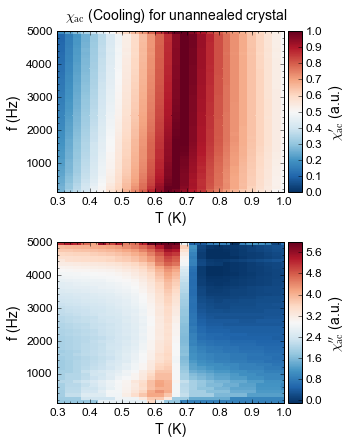

In [23]:
# Ｐｌｏｔ　ｃｏｌｏｒ　ｍａｐ　ｏｆ　ｔｈｅ　ｒｅａｌ　ｐａｒｔ
% matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig = plt.figure(figsize=(5,6))

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(5,6))#, gridspec_kw = {'width_ratios':[5, 4]})
plt.suptitle(r"$\chi_{\rm ac}$ (Cooling) for unannealed crystal ",fontsize=14,y=1.02)

#plt.contour(temps, freqs, dat.imag.T, 20, colors='k',linewidths=0.1)  # negative contours will be dashed by default

# pcolormesh actually draws individual rectangles which contains white lines
pcol = axs[0].pcolormesh(temps, freqs, dat.real.T, cmap='RdBu_r',vmin=-0.00, vmax=1, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[0])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"$\chi_{\rm ac}'$ (a.u.)",fontsize=14)
cb.ax.tick_params(labelsize=12)


pcol = axs[1].pcolormesh(temps, freqs, dat.imag.T, cmap='RdBu_r', vmin=-0.1, vmax=6, linewidth=0, rasterized=True)# '_r' is reversed colormap
pcol.set_edgecolor('face') # remove the white lines in the plot

# Create divider for existing axes instance
divider0 = make_axes_locatable(axs[1])
# Append axes to the right of ax3, with 20% width of ax3
cax0 = divider0.append_axes("right", size="6%", pad=0.05)
# Create colorbar in the appended axes
cb = plt.colorbar(pcol,cax=cax0) # this one gives one 1e-05 at the top of the colorbar
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
cb.ax.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",fontsize=14)
cb.ax.tick_params(labelsize=12)
# set colorbar and its properties
#cb = plt.colorbar(format='%.1e') # it gives 0.3e-05 format for every tick lable


for ax in axs.reshape(-1):
    # set the limits of the plot to the limits of the data
    ax.axis([temps.min(), 1.0, freqs.min(), freqs.max()])
    #ax.axis([temps.min(), temps.max(), freqs.min(), freqs.max()])
    ax.set_xlabel('T (K)',size=14)
    ax.set_ylabel('f (Hz)',size=14)
    #ax.xaxis.labelpad = 1
    
    ax.minorticks_on()
    
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    
    [item.set_fontsize(12) for item in (ax.get_xticklabels() + ax.get_yticklabels())]
    #ax.get_xticklabels().set_fontsize(14) # not working because  get_xticklabels() yeilds a list
    #ax.set_xticks( color='k', size=14) # not working

plt.tight_layout() # arange the subplots
plt.show()

# the transition at 0.655K

<IPython.core.display.Javascript object>


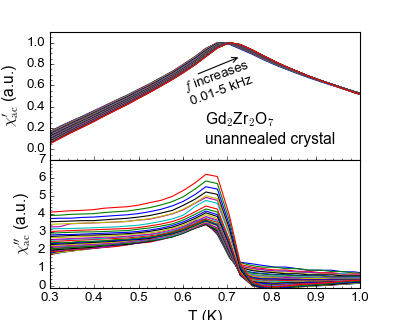

In [25]:
# Ｐｌｏｔ　ｔｈｅ　ｒｅａｌ　ａｎｄ　ｉｍａｇｉｎａｒｙ　ｐａｒｔ
% matplotlib notebook

#fig = plt.figure(figsize=(5,8))
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, figsize=(5,4))
  
#plt.suptitle(r"$\chi_{\rm ac}$ (ZFC) for annealed crystal ",fontsize=14, y=0.96)
for i in range(0,49):
    #print i, np.std(dat[temps<0.6,i].imag) 
    if np.std(dat[temps<0.6,i].imag)<0.4: # do not plot the data which is noisy for T<0.6~K
        ax1.plot(temps, dat[:,i].real)
        ax2.plot(temps, dat[:,i].imag)

#ax1.set_xlim(0.3,1.5)
ax1.set_ylim(-0.1,1.1)

ax2.set_xlim(0.3,1)
ax2.set_ylim(-0.1,7)
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_ylabel(r"""$\chi_{\rm ac}^{\prime}$ (a.u.)""",size=14)#,labelpad=0)  
ax2.set_xlabel(r'T (K)',size=14)#,labelpad=0)
ax2.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",size=14)#,labelpad=0)

ax1.tick_params(axis='both',which='both',labelsize=12)
ax2.tick_params(axis='both',which='both',labelsize=12) # width=1,length=4,

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

# Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
fig.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

ax1.annotate('', xy=(0.73,0.87),fontsize=12, xytext=(0.63,0.7),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='bottom')
bbox_props = dict(fc="white", ec="white", lw=0.5)#,boxstyle="rarrow,pad=0.")
t = ax1.text(0.68, 0.63, "$f$ increases\n0.01-5 kHz", ha="center", va="center", rotation=20,size=12,zorder=0, bbox=bbox_props)

ax1.text(0.65, 0.2,r'Gd$_2$Zr$_2$O$_7$'+ '\n'+'unannealed crystal',size=14, ha='left', va='center', 
         backgroundcolor='white',bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

fig.savefig(os.path.join(fpath, r'gd_xac_crys_unann.pdf'), bbox_inches="tight",verbose=True) 

plt.show()

#print dat[:,0].real,'\n', dat[:,48].real


## 0.1T filed cooling T scan at 500Hz and warming with long waiting time

In [9]:
# Ｆｉｌｅｄ　０．１Ｔ　ｃｏｏｌｉｎｇ and　ｗａｒｍｉｎｇ　ｍｅａｓｕｒｅｍｅｎｔｓ　ｗｉｔｈ　５００Ｈｚ　ＡＣ　ｃｕｒｒｅｎｔ
# ｌｏａｄ　ｄａｔａ
# Data: cooling in 0.1T, warming up. Cooling from 10K in 0.1T 
fpath = r'D:\3_Physical Properties\Gd2Zr2O7\Gd2Zr2O7_AC_Suscept\1_Single_crystal\unann_GdZr_disorder'
fname = r'2016_08_30_ACS_CM8T_Heliox_LTS2_1mAAmpl_500Hz_0T1_TempScan_1K_0K3_down.dat'
fname0 = r'2016_08_30_ACS_CM8T_Heliox_LTS2_1mAAmpl_500Hz_0T1_TempScan_1K_0K3_up.dat'
fname1 = r'2016_08_30_ACS_CM8T_Heliox_LTS2_1mAAmpl_500Hz_0T1_TempScan_1K_0K3_down_FieldCoolStartingAt10K.dat'

f = os.path.join(fpath, fname)
f0 = os.path.join(fpath, fname0)
f1 = os.path.join(fpath, fname1)

###################################################
# load cooling data

rawdat = np.genfromtxt(f, usecols=(2,5,6,7,8),skip_header=1) # temperature, frequency, current， Xreal, Ximagine
# This file constaind Temperature scan (0.3-1K, 60pts), with repeated measurement at every temperature

print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_Ts = 60
dat = np.zeros([60,2],dtype=complex) # 60 temps
print dat.shape

# prepare for plot
dat[:,0] = rawdat[0::2,0]

dat[:,1].real = -(rawdat[0::2,4]+rawdat[1::2,4])/2.0 
dat[:,1].imag = -(rawdat[0::2,3]+rawdat[1::2,3])/2.0
#print dat

#####################################################
# load the warming data
rawdat = np.genfromtxt(f0, usecols=(2,5,6,7,8),skip_header=1) # temperature, frequency, current， Xreal, Ximagine
# This file constaind Temperature scan (0.3-1K, 60pts), with repeated measurement at every temperature

print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_Ts = 60
dat0 = np.zeros([60,2],dtype=complex) # 60 temps
print dat0.shape

# prepare for plot
dat0[:,0] = rawdat[0::2,0]

dat0[:,1].real = -(rawdat[0::2,4]+rawdat[1::2,4])/2.0 
dat0[:,1].imag = -(rawdat[0::2,3]+rawdat[1::2,3])/2.0
#print dat

#####################################################
# load the warming data
rawdat = np.genfromtxt(f1, usecols=(2,5,6,7,8),skip_header=1) # temperature, frequency, current， Xreal, Ximagine
# This file constaind Temperature scan (0.3-1K, 60pts), with repeated measurement at every temperature

print rawdat.shape

rawdat[:,3] = rawdat[:,3]/(rawdat[:,1]*rawdat[:,2])# the X_ac is voltage/(f*I)
rawdat[:,4] = rawdat[:,4]/(rawdat[:,1]*rawdat[:,2])

nb_Ts = 100
dat1 = np.zeros([100,2],dtype=complex) # 60 temps
print dat1.shape

# prepare for plot
dat1[:,0] = rawdat[0::2,0]

dat1[:,1].real = -(rawdat[0::2,4]+rawdat[1::2,4])/2.0 
dat1[:,1].imag = -(rawdat[0::2,3]+rawdat[1::2,3])/2.0
#print dat


(120L, 5L)
(60L, 2L)
(120L, 5L)
(60L, 2L)
(200L, 5L)
(100L, 2L)


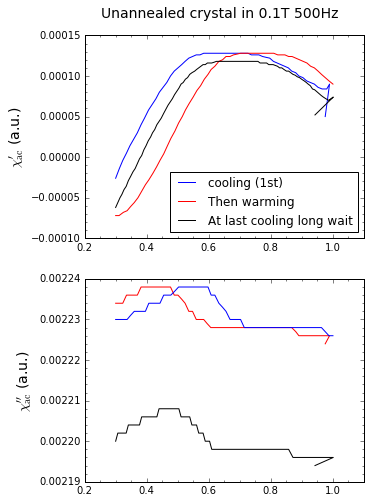

In [21]:
% matplotlib inline
fig = plt.figure(figsize=(5,8))

ax1 = fig.add_subplot(211, autoscale_on=True, xscale='linear')
ax2 = fig.add_subplot(212, autoscale_on=True, xscale='linear')   

ax1.plot(dat[:,0], dat[:,1].real, c='blue',label='cooling (1st)')
ax1.plot(dat0[:,0], dat0[:,1].real,c='r',label='Then warming')
ax1.plot(dat1[:,0], dat1[:,1].real,c='black',label='At last cooling long wait')
ax1.set_ylabel(r"$\chi_{\rm ac}'$ (a.u.)",fontsize=14)
ax1.legend(loc='best')

ax2.plot(dat[:,0], dat[:,1].imag,c='r')
ax2.plot(dat0[:,0], dat0[:,1].imag,c='blue')
ax2.plot(dat1[:,0], dat1[:,1].imag,c='black')
ax2.set_ylabel(r"""$\chi_{\rm ac}^{\prime\prime}$ (a.u.)""",fontsize=14)

plt.suptitle(r'Unannealed crystal in 0.1T 500Hz',fontsize=14,y=0.95)
#ax2.set_xlim(0,0.8)
#ax2.set_ylim(0,0.000014)

ax1.minorticks_on()
ax2.minorticks_on()

plt.show()